<a href="https://colab.research.google.com/github/kaneelgit/stock-data/blob/main/stock_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<u> <font size = '5'> **Using deep learning to predict if the stock goes up or down based on news** </font> </u>

In [ ]:
#import the libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import string

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
#upload the file
from google.colab import files
import io

uploaded = files.upload()

Saving dataset_news.csv to dataset_news.csv


In [ ]:
#get the csv file and upload it to a pandas dataframe
df = pd.read_csv(io.BytesIO(uploaded['dataset_news.csv']))

df = df.astype({'W1_2': 'category', 'W2_2': 'category', 'W5_2': 'category', 'W10_2': 'category', 'W1_5': 'category', 'W1_10': 'category', 'W2_5': 'category', 'W2_10': 'category',\
                'W5_5': 'category', 'W5_10': 'category', 'W10_5': 'category', 'W10_10': 'category', 'NEWS': 'string'})

df2 = df

df.head(10)

,Unnamed: 0,NEWS,DATE,TICKER,SP1,SP2,SP5,SP10,W1_2,W2_2,W5_2,W10_2,W1_5,W1_10,W2_5,W2_10,W5_5,W5_10,W10_5,W10_10
0,0,City's deal with Loews rides wave of Mid-South...,2020-03-11 15:43:00,L,39.73,37.01,33.42,31.26,0,0,0,0,0,0,0,0,0,0,0,0
1,1,"Engine No 1, the giant-killing hedge fund, has...",2021-06-02 20:00:00,XOM,61.18,61.45,61.05,61.05,1,1,1,1,0,0,0,0,0,0,0,0
2,2,Is Target Unstoppable After Another Big Earnin...,2021-05-25 10:36:00,TGT,225.30,227.37,227.27,231.34,1,1,1,1,1,2,1,2,1,1,1,1
3,3,Tesla champion Ark Investment outguns Wall Str...,2021-01-31 19:00:00,STT,70.25,71.60,74.77,72.92,2,1,1,1,2,2,2,2,2,1,1,1
4,4,Here's Why NVIDIA Stock Jumped Today,2021-05-28 19:28:00,NVDA,649.78,650.58,678.79,704.76,1,1,1,1,2,2,2,2,1,2,1,1
5,5,The Southern Co. to Host Earnings Call,2021-02-18 11:15:00,SO,59.85,59.31,58.92,57.78,0,0,0,0,0,0,0,0,0,0,0,0
6,6,Here's Why Healthpeak Properties Is Worth a Lo...,2020-12-18 07:12:00,PEAK,29.83,29.38,29.52,29.92,0,0,0,0,0,1,0,1,0,1,0,1
7,7,AES Announces Private Offering of Senior Notes,2020-11-19 08:39:00,AES,20.88,20.42,21.15,20.44,0,0,0,0,2,0,1,0,1,0,1,0
8,8,Incyte Announces Acceptance and Priority Revie...,2021-02-19 08:00:00,INCY,80.54,79.92,80.61,79.63,0,0,0,0,1,0,1,0,1,0,1,0
9,9,"SHAREHOLDER ALERT: Levi & Korsinsky, LLP Notif...",2021-04-23 12:28:00,APA,18.18,18.65,20.49,20.46,2,2,1,1,2,2,2,2,2,2,2,2


SP1 - Price of stock day of news

SP2 - Price of stock the day after news

SP5 - Price of the stock five days after news

SP10 - Price of stock ten days after news

W1_2 - Winner/loser 1% after 1 day

W1_5 - Winner/loser 1% after day 5

W1_10 - Winner/loser 1% after day 10 



In [ ]:
#check info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33036 entries, 0 to 33035
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  33036 non-null  int64   
 1   NEWS        33036 non-null  string  
 2   DATE        33036 non-null  object  
 3   TICKER      33036 non-null  object  
 4   SP1         33036 non-null  float64 
 5   SP2         33036 non-null  float64 
 6   SP5         33036 non-null  float64 
 7   SP10        33036 non-null  float64 
 8   W1_2        33036 non-null  category
 9   W2_2        33036 non-null  category
 10  W5_2        33036 non-null  category
 11  W10_2       33036 non-null  category
 12  W1_5        33036 non-null  category
 13  W1_10       33036 non-null  category
 14  W2_5        33036 non-null  category
 15  W2_10       33036 non-null  category
 16  W5_5        33036 non-null  category
 17  W5_10       33036 non-null  category
 18  W10_5       33036 non-null  category
 19  W10_

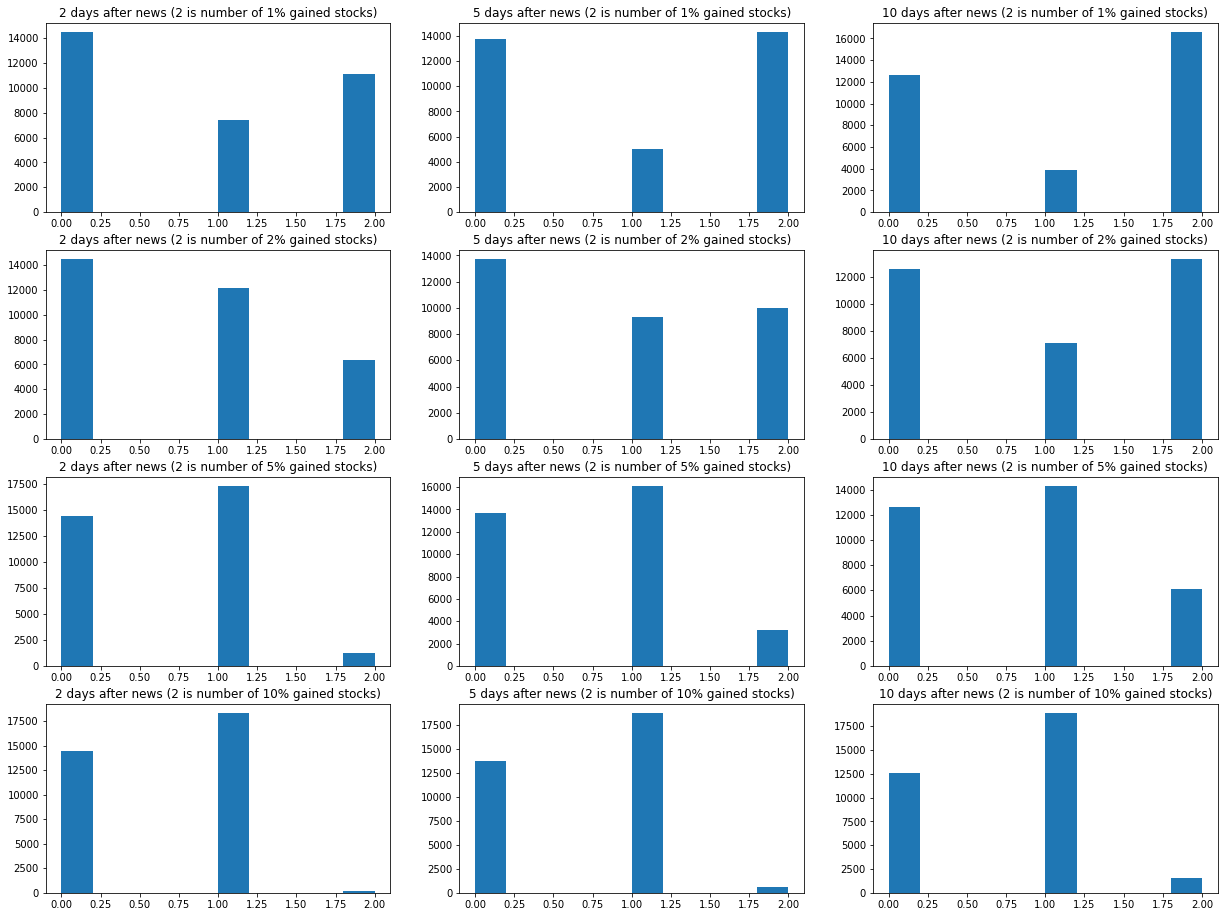

In [ ]:
#see if the categorical data is even plot histograms
fig = plt.figure(figsize = (21, 16))

#percentages and days to get column number
percentages = [1, 2, 5, 10]
days = [2, 5, 10]

i = 1

for p, percentage in enumerate(percentages):

  for d, day in enumerate(days):

    col_name = 'W' + str(percentage) + '_' + str(day)
    ax = fig.add_subplot(4, 3, i)
    ax.hist(df[col_name])
    ax.set_title(str(day) + ' days after news ' + '(2 is number of ' + str(percentage) +'% gained stocks)')
    i += 1

Looking at the plots 1% and 2% gains for all three days seems to be evenly distributed. So we can use these as categories first.

Just plot histograms of the stock prices as well. 

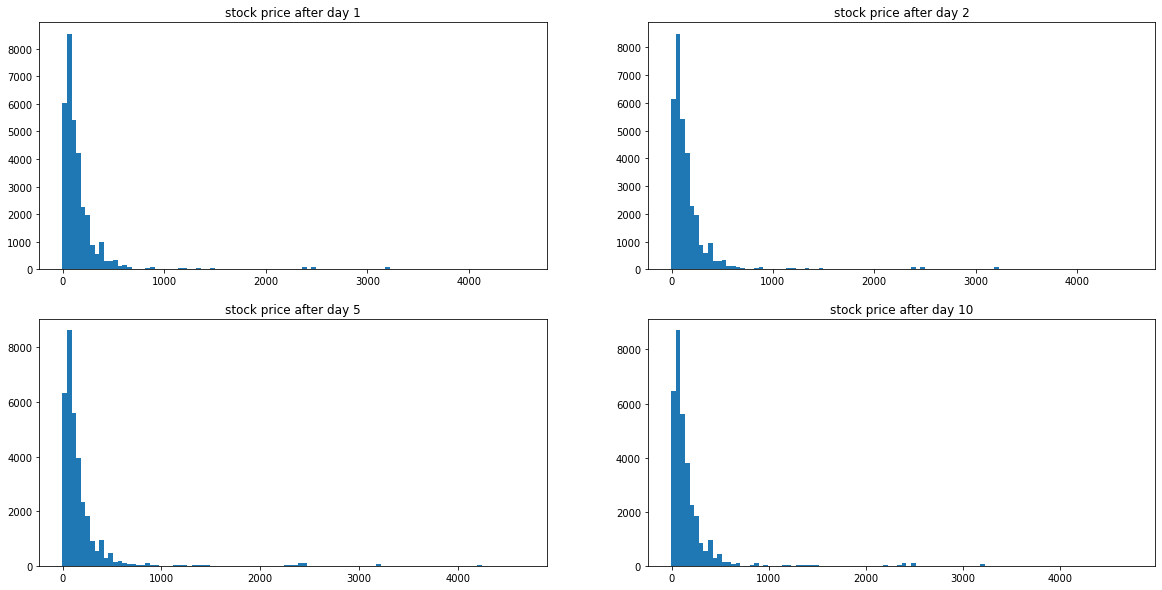

In [ ]:
#see if the categorical data is even plot histograms
fig = plt.figure(figsize = (20, 10))

#percentages and days to get column number
days = [1, 2, 5, 10]

i = 1

for d, day in enumerate(days):

  col_name = 'SP' + str(day)
  ax = fig.add_subplot(2, 2, i)
  ax.hist(df[col_name], bins = 100)
  ax.set_title('stock price after day ' + str(day))
  i += 1

Now let's use a text classifier to see if we can predict the three categories. 

First devide the data into train and test set. Let's use 80% of the data as train and the rest as test. 

<u> First let's try to see if we can classify W1_2 (winning 1% after the day news was presented </u>

In [ ]:
#80% data
split_idx = int(np.round(len(df) * 0.8))

#train data and label
raw_train_data = df['NEWS'][:split_idx]
train_labels = df['W1_2'][:split_idx]

#test data and label
raw_test_data = df['NEWS'][split_idx:].reset_index(drop = True)
test_labels = df['W1_2'][split_idx:].reset_index(drop = True) 

print('Number of train data: ', len(raw_train_data))
print('Number of test data: ', len(raw_test_data))

#print some of the news as examples
print('\nNews examples: ')
print('-----------')
print(raw_train_data[random.randint(0, split_idx)])
print(raw_train_data[random.randint(0, split_idx)])
print(raw_train_data[random.randint(0, split_idx)])

Number of train data:  26429
Number of test data:  6607

News examples: 
-----------
Facebook trolls Apple with vow not to take cut of revenue from creators until 2023, unveils new payout interface before WWDC
Is West Pharmaceutical Services (WST) Outperforming Other Medical Stocks This Year?
Celanese (CE) Is Up 0.29% in One Week: What You Should Know


In [ ]:
#next let's remove punctuation from the strings in news. To do this let's create a function
def remove_punc(text):
  
  #lowercase the text
  lowercase = text.lower()
  punc = string.punctuation
  #remove punctuations
  for p in punc:
    lowercase = lowercase.replace(p, '')
  return lowercase
  
#check if it worked
for i in range(5):
   
  text = raw_train_data[random.randint(0, split_idx)]
  print('Original text --> ', text)
  print('Adjusted text --> ', remove_punc(text))
  print('\n')

Original text -->  Exclusive: Hedge fund Sachem Head targets International Flavors - sources
Adjusted text -->  exclusive hedge fund sachem head targets international flavors  sources


Original text -->  5 Must-Buy Stocks on Sector Rotation Away From Technology
Adjusted text -->  5 mustbuy stocks on sector rotation away from technology


Original text -->  Sadler's Smokehouse Donates more than $285,000 of Pulled Pork to Help Feed Those in Need in Texas and Across the Country
Adjusted text -->  sadlers smokehouse donates more than 285000 of pulled pork to help feed those in need in texas and across the country


Original text -->  FBL Financial (FFG) to Share More Profits, Ups Dividend by 4%
Adjusted text -->  fbl financial ffg to share more profits ups dividend by 4


Original text -->  First-Ever Amphibian Becomes 2021 Cadbury Bunny
Adjusted text -->  firstever amphibian becomes 2021 cadbury bunny




All punctuations are removed. So now can apply this function and remove the puncuations and lower case the train and test news data.


In [ ]:
#apply to train data
train_data = raw_train_data.apply(remove_punc)
test_data = raw_test_data.apply(remove_punc)


Now let's vectorize the news data. Let's select the maximum features and the sequence length of text. 

In [ ]:
#first put the train data and labels to one dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_data.values, train_labels.values))

#do the same for the test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((test_data.values, test_labels.values))

#print out some of the values to see if it worked
for feat, targ in train_dataset.take(10):
  print('Feature: {}, Target: {}'.format(feat, targ))

Feature: b'citys deal with loews rides wave of midsouth hotel development', Target: 0
Feature: b'engine no 1 the giantkilling hedge fund has big plans', Target: 1
Feature: b'is target unstoppable after another big earnings beat', Target: 1
Feature: b'tesla champion ark investment outguns wall street titans', Target: 2
Feature: b'heres why nvidia stock jumped today', Target: 1
Feature: b'the southern co to host earnings call', Target: 0
Feature: b'heres why healthpeak properties is worth a look now', Target: 0
Feature: b'aes announces private offering of senior notes', Target: 0
Feature: b'incyte announces acceptance and priority review of nda for ruxolitinib cream for atopic dermatitis', Target: 0
Feature: b'shareholder alert levi  korsinsky llp notifies shareholders of apache corporation of a class action lawsuit and a lead plaintiff deadline of april 26 2021  apa', Target: 2


In [ ]:
#max features and sequence length
max_features = 10000
sequence_length = 250

#initialize vectorization
vectorize_layer = TextVectorization(max_tokens = max_features, output_mode = 'int', output_sequence_length = sequence_length)

#get train text from the train_datset
train_text = train_dataset.map(lambda x, y: x)


#use the vectorize layer on the train dataset
vectorize_layer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):
  
  text = tf.expand_dims(text, -1)
  
  
  return vectorize_layer(text), label

#check the vectorized version of a news
txt, lbl = next(iter(train_dataset))

print('News --> ', txt)
print('Label --> ', lbl)

vect_layer = vectorize_text(txt, lbl)
print('Vectorized version of the news:\n ', vect_layer)

#check the words in the vocabulatory
vocab_list = vectorize_layer.get_vocabulary()
print('\nPrint some of the indexes given in the vec_layer list: \n')

for i in vect_layer[0].numpy()[0][:5]:
  print(vocab_list[i]) 

News -->  tf.Tensor(b'citys deal with loews rides wave of midsouth hotel development', shape=(), dtype=string)
Label -->  tf.Tensor(0, shape=(), dtype=int64)
Vectorized version of the news:
  (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[9780,  112,   16, 1440, 1370, 1359,    5,    1, 1768,  576,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,

In [ ]:
#now let's apply the vectorize text function to train and test data
train = train_dataset.batch(20).map(vectorize_text)
test = test_dataset.batch(20).map(vectorize_text)

In [ ]:
test

<MapDataset shapes: ((None, 250), (None,)), types: (tf.int64, tf.int64)>

In [ ]:
#cache the data
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size = AUTOTUNE)
test = test.cache().prefetch(buffer_size = AUTOTUNE)

Now Let's create the model and apply it to the train set.

In [ ]:
embedding_dim = 16
#initialize the model
modelb = tf.keras.Sequential([layers.Embedding(max_features + 1, embedding_dim), layers.Dropout(0.5), layers.GlobalAveragePooling1D(), layers.Dropout(0.2), layers.Dense(3)])

#print model summary
modelb.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160016    
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 3)                 51        
Total params: 160,067
Trainable params: 160,067
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#select the loss function and the optimizer
modelb.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
import time
tick = time.time()

epochs = 10
history = modelb.fit(train, epochs = epochs)

tock = time.time()
print('Took', (tock - tick)/60, 'minutes to run')

Epoch 1/10
1322/1322 [==============================] - 7s 5ms/step - loss: 1.1002 - accuracy: 0.4225
Epoch 2/10
1322/1322 [==============================] - 6s 5ms/step - loss: 1.0582 - accuracy: 0.4373
Epoch 3/10
1322/1322 [==============================] - 6s 4ms/step - loss: 1.0515 - accuracy: 0.4395
Epoch 4/10
1322/1322 [==============================] - 6s 5ms/step - loss: 1.0230 - accuracy: 0.4694
Epoch 5/10
1322/1322 [==============================] - 6s 5ms/step - loss: 1.0170 - accuracy: 0.4733
Epoch 6/10
1322/1322 [==============================] - 6s 5ms/step - loss: 0.9909 - accuracy: 0.5082
Epoch 7/10
1322/1322 [==============================] - 6s 5ms/step - loss: 0.9742 - accuracy: 0.5263
Epoch 8/10
1322/1322 [==============================] - 6s 5ms/step - loss: 0.9752 - accuracy: 0.5250
Epoch 9/10
1322/1322 [==============================] - 6s 5ms/step - loss: 1.0120 - accuracy: 0.5016
Epoch 10/10
1322/1322 [==============================] - 6s 5ms/step - loss: 0.976

In [ ]:
#use a different model
model2 = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(3, activation=tf.nn.softmax)])

model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history2 = model2.fit(train, epochs = 10)

Epoch 1/10
1322/1322 [==============================] - 3s 2ms/step - loss: 9.7261 - accuracy: 0.3666
Epoch 2/10
1322/1322 [==============================] - 2s 2ms/step - loss: 1.1358 - accuracy: 0.4069
Epoch 3/10
1322/1322 [==============================] - 3s 2ms/step - loss: 1.0788 - accuracy: 0.4280
Epoch 4/10
1322/1322 [==============================] - 3s 2ms/step - loss: 1.0660 - accuracy: 0.4361
Epoch 5/10
1322/1322 [==============================] - 2s 2ms/step - loss: 1.0649 - accuracy: 0.4382
Epoch 6/10
1322/1322 [==============================] - 2s 2ms/step - loss: 1.0642 - accuracy: 0.4375
Epoch 7/10
1322/1322 [==============================] - 3s 2ms/step - loss: 1.0640 - accuracy: 0.4378
Epoch 8/10
1322/1322 [==============================] - 2s 2ms/step - loss: 1.0639 - accuracy: 0.4381
Epoch 9/10
1322/1322 [==============================] - 2s 2ms/step - loss: 1.0644 - accuracy: 0.4382
Epoch 10/10
1322/1322 [==============================] - 2s 2ms/step - loss: 1.064

In [ ]:
#check how accurate it can predict the test data
model.evaluate(test)

331/331 [==============================] - 1s 1ms/step - loss: 1.0601 - accuracy: 0.4418


[1.0601345300674438, 0.4418041408061981]

The model is not predicting the three categories as expected. This could be because there is a different between the number of data points in the three classes. So now let's do the same analysis and see if the stock went up(1) or down(0) after news. Also We will be testing after 10 days in this attempt. 

In [ ]:
#first let's create a new dataset just to make everything clear
cols = ['NEWS', 'SP1', 'SP2', 'SP5', 'SP10']

#new dataframe
df2 = df[cols]
df2.head(10)


,NEWS,SP1,SP2,SP5,SP10
0,City's deal with Loews rides wave of Mid-South...,39.73,37.01,33.42,31.26
1,"Engine No 1, the giant-killing hedge fund, has...",61.18,61.45,61.05,61.05
2,Is Target Unstoppable After Another Big Earnin...,225.30,227.37,227.27,231.34
3,Tesla champion Ark Investment outguns Wall Str...,70.25,71.60,74.77,72.92
4,Here's Why NVIDIA Stock Jumped Today,649.78,650.58,678.79,704.76
5,The Southern Co. to Host Earnings Call,59.85,59.31,58.92,57.78
6,Here's Why Healthpeak Properties Is Worth a Lo...,29.83,29.38,29.52,29.92
7,AES Announces Private Offering of Senior Notes,20.88,20.42,21.15,20.44
8,Incyte Announces Acceptance and Priority Revie...,80.54,79.92,80.61,79.63
9,"SHAREHOLDER ALERT: Levi & Korsinsky, LLP Notif...",18.18,18.65,20.49,20.46


Let's add new categorical columns but this time if the stock goes up or down (not percentage).

- W10 = Winner in the 10th day after news (1- yes 0- no)

- W2 = Winner 2 days after news

In [ ]:
#create the two columns
df2['W10'] = [1 if (x > y) else 0 for x, y in zip(df2.SP2, df2.SP1)]
df2['W2'] = [1 if (x > y) else 0 for x,y in zip(df2.SP10, df2.SP1)]
df2.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,NEWS,SP1,SP2,SP5,SP10,W10,W2
0,City's deal with Loews rides wave of Mid-South...,39.73,37.01,33.42,31.26,0,0
1,"Engine No 1, the giant-killing hedge fund, has...",61.18,61.45,61.05,61.05,1,0
2,Is Target Unstoppable After Another Big Earnin...,225.30,227.37,227.27,231.34,1,1
3,Tesla champion Ark Investment outguns Wall Str...,70.25,71.60,74.77,72.92,1,1
4,Here's Why NVIDIA Stock Jumped Today,649.78,650.58,678.79,704.76,1,1
5,The Southern Co. to Host Earnings Call,59.85,59.31,58.92,57.78,0,0
6,Here's Why Healthpeak Properties Is Worth a Lo...,29.83,29.38,29.52,29.92,0,1
7,AES Announces Private Offering of Senior Notes,20.88,20.42,21.15,20.44,0,0
8,Incyte Announces Acceptance and Priority Revie...,80.54,79.92,80.61,79.63,0,0
9,"SHAREHOLDER ALERT: Levi & Korsinsky, LLP Notif...",18.18,18.65,20.49,20.46,1,1


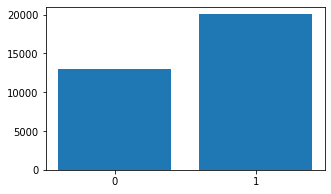

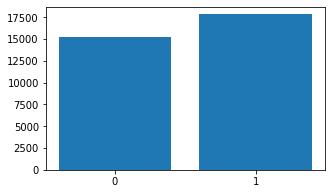

In [ ]:
#plot histograms to see if the data is balanced
#W2
dataw2 = {"0": len(df2[df2.W2 == 0]), "1": len(df2[df2.W2 == 1])}
plt.figure(figsize = (5, 3))
plt.bar(dataw2.keys(), dataw2.values())
plt.show()

#W10
dataw10 = {"0": len(df2[df2.W10 == 0]), "1": len(df2[df2.W10 == 1])}
plt.figure(figsize = (5, 3))
plt.bar(dataw10.keys(), dataw10.values())
plt.show()

In [ ]:
#process the data

#80% data
split_idx = int(np.round(len(df2) * 0.8))

#train data and label
raw_train_data = df2['NEWS'][:split_idx]
train_labels = df2['W2'][:split_idx]

#test data and label
raw_test_data = df2['NEWS'][split_idx:].reset_index(drop = True)
test_labels = df2['W2'][split_idx:].reset_index(drop = True) 

#apply to train data
train_data = raw_train_data.apply(remove_punc)
test_data = raw_test_data.apply(remove_punc)

#first put the train data and labels to one dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_data.values, train_labels.values))

#do the same for the test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((test_data.values, test_labels.values))

#max features and sequence length
max_features = 10000
sequence_length = 250

#initialize vectorization
vectorize_layer = TextVectorization(max_tokens = max_features, output_mode = 'int', output_sequence_length = sequence_length)

#get train text from the train_datset
train_text = train_dataset.map(lambda x, y: x)

#use the vectorize layer on the train dataset
vectorize_layer.adapt(train_text)

#now let's apply the vectorize text function to train and test data
train = train_dataset.batch(32).map(vectorize_text)
test = test_dataset.batch(32).map(vectorize_text)

#cache the data
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size = AUTOTUNE)
test = test.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
#train the model
embedding_dim = 16
#initialize the model
model = tf.keras.Sequential([layers.Embedding(max_features + 1, embedding_dim), layers.Dropout(0.2), layers.GlobalAveragePooling1D(), layers.Dropout(0.2), layers.Dense(1)])

#print model summary
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, None, 16)          160016    
_________________________________________________________________
dropout_58 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_29  (None, 16)                0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [ ]:
import time
tick = time.time()

epochs = 10
history = model.fit(train, epochs = epochs)

tock = time.time()
print('Took', (tock - tick)/60, 'minutes to run')

Epoch 1/10
826/826 [==============================] - 6s 7ms/step - loss: 0.6722 - binary_accuracy: 0.6044
Epoch 2/10
826/826 [==============================] - 5s 7ms/step - loss: 0.6708 - binary_accuracy: 0.6048
Epoch 3/10
826/826 [==============================] - 5s 7ms/step - loss: 0.6704 - binary_accuracy: 0.6048
Epoch 4/10
826/826 [==============================] - 5s 7ms/step - loss: 0.6693 - binary_accuracy: 0.6048
Epoch 5/10
826/826 [==============================] - 5s 7ms/step - loss: 0.6681 - binary_accuracy: 0.6048
Epoch 6/10
826/826 [==============================] - 5s 7ms/step - loss: 0.6668 - binary_accuracy: 0.6048
Epoch 7/10
826/826 [==============================] - 5s 7ms/step - loss: 0.6648 - binary_accuracy: 0.6048
Epoch 8/10
826/826 [==============================] - 5s 6ms/step - loss: 0.6617 - binary_accuracy: 0.6048
Epoch 9/10
826/826 [==============================] - 5s 7ms/step - loss: 0.6580 - binary_accuracy: 0.6052
Epoch 10/10
826/826 [================

<u> Check if the stock gained or went down in 10 days after the news </u>

In [ ]:
#now do check the accuracy after 10 days

#process the data

#80% data
split_idx = int(np.round(len(df2) * 0.8))

#train data and label
raw_train_data = df2['NEWS'][:split_idx]
train_labels = df2['W10'][:split_idx]

#test data and label
raw_test_data = df2['NEWS'][split_idx:].reset_index(drop = True)
test_labels = df2['W10'][split_idx:].reset_index(drop = True) 

#apply to train data
train_data = raw_train_data.apply(remove_punc)
test_data = raw_test_data.apply(remove_punc)

#first put the train data and labels to one dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_data.values, train_labels.values))

#do the same for the test dataset
test_dataset = tf.data.Dataset.from_tensor_slices((test_data.values, test_labels.values))

#max features and sequence length
max_features = 10000
sequence_length = 250

#initialize vectorization
vectorize_layer = TextVectorization(max_tokens = max_features, output_mode = 'int', output_sequence_length = sequence_length)

#get train text from the train_datset
train_text = train_dataset.map(lambda x, y: x)

#use the vectorize layer on the train dataset
vectorize_layer.adapt(train_text)

#now let's apply the vectorize text function to train and test data
train = train_dataset.batch(10).map(vectorize_text)
test = test_dataset.batch(10).map(vectorize_text)

#cache the data
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size = AUTOTUNE)
test = test.cache().prefetch(buffer_size = AUTOTUNE)

In [ ]:
#train the model
embedding_dim = 16
#initialize the model
model = tf.keras.Sequential([layers.Embedding(max_features + 1, embedding_dim), layers.Dropout(0.2), layers.GlobalAveragePooling1D(), layers.Dropout(0.2), layers.Dense(1)])

model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

In [ ]:
import time
tick = time.time()

epochs = 15
history = model.fit(train, epochs = epochs)

tock = time.time()
print('Took', (tock - tick)/60, 'minutes to run')

Epoch 1/15
2643/2643 [==============================] - 11s 4ms/step - loss: 0.6902 - binary_accuracy: 0.5398
Epoch 2/15
2643/2643 [==============================] - 10s 4ms/step - loss: 0.6892 - binary_accuracy: 0.5397
Epoch 3/15
2643/2643 [==============================] - 10s 4ms/step - loss: 0.6878 - binary_accuracy: 0.5396
Epoch 4/15
2643/2643 [==============================] - 10s 4ms/step - loss: 0.6853 - binary_accuracy: 0.5451
Epoch 5/15
2643/2643 [==============================] - 10s 4ms/step - loss: 0.6814 - binary_accuracy: 0.5596
Epoch 6/15
2643/2643 [==============================] - 10s 4ms/step - loss: 0.6748 - binary_accuracy: 0.5841
Epoch 7/15
2643/2643 [==============================] - 10s 4ms/step - loss: 0.6660 - binary_accuracy: 0.6099
Epoch 8/15
2643/2643 [==============================] - 11s 4ms/step - loss: 0.6561 - binary_accuracy: 0.6277
Epoch 9/15
2643/2643 [==============================] - 11s 4ms/step - loss: 0.6458 - binary_accuracy: 0.6424
Epoch 10/1

In [ ]:
#use test dataset to predict
model.evaluate(test)

661/661 [==============================] - 1s 1ms/step - loss: 0.6951 - binary_accuracy: 0.5586


[0.6951003074645996, 0.5586498975753784]

In [ ]:
#increase dropout
#train the model
embedding_dim = 16
#initialize the model
model = tf.keras.Sequential([layers.Embedding(max_features + 1, embedding_dim), layers.Dropout(0.5), layers.GlobalAveragePooling1D(), layers.Dense(100),
                             layers.Dropout(0.5), layers.Dense(1)])

model.compile(loss=losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.0))

import time
tick = time.time()

epochs = 15
history = model.fit(train, epochs = epochs)

tock = time.time()
print('Took', (tock - tick)/60, 'minutes to run')

Epoch 1/15
2643/2643 [==============================] - 12s 4ms/step - loss: 0.6907 - binary_accuracy: 0.5391
Epoch 2/15
2643/2643 [==============================] - 11s 4ms/step - loss: 0.6904 - binary_accuracy: 0.5396
Epoch 3/15
2643/2643 [==============================] - 11s 4ms/step - loss: 0.6886 - binary_accuracy: 0.5416
Epoch 4/15
2643/2643 [==============================] - 12s 4ms/step - loss: 0.6741 - binary_accuracy: 0.5835
Epoch 5/15
2643/2643 [==============================] - 11s 4ms/step - loss: 0.6472 - binary_accuracy: 0.6212
Epoch 6/15
2643/2643 [==============================] - 11s 4ms/step - loss: 0.6280 - binary_accuracy: 0.6436
Epoch 7/15
2643/2643 [==============================] - 12s 5ms/step - loss: 0.6149 - binary_accuracy: 0.6572
Epoch 8/15
2643/2643 [==============================] - 12s 4ms/step - loss: 0.6042 - binary_accuracy: 0.6639
Epoch 9/15
2643/2643 [==============================] - 11s 4ms/step - loss: 0.5953 - binary_accuracy: 0.6714
Epoch 10/1

In [ ]:
#use test dataset to predict
model.evaluate(test)

661/661 [==============================] - 1s 1ms/step - loss: 0.7597 - binary_accuracy: 0.5426


[0.7596632242202759, 0.5426063537597656]

In [ ]:
#create a function with the data
def compile_and_fit(train_ds, val_ds, model, name, optimizer = None, max_epochs = 10000):


  model.compile(optimizer = 'Adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits = True), metrics = [tf.keras.losses.BinaryCrossentropy(from_logits = True, name = \
                                                                                                                                              'binary_crossentropy'), 'accuracy'])
  
  model.summary()

  history = model.fit(train_ds, epochs = max_epochs, validation_data = val_ds, verbose = 0)

  return history



In [ ]:
tiny_model = tf.keras.Sequential([
    layers.Dense(16, activation='elu', input_shape=(250,)),
    layers.Dense(1) ])

compile_and_fit(train, test, tiny_model, 'sizes/Tiny')

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 16)                4016      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 4,033
Trainable params: 4,033
Non-trainable params: 0
_________________________________________________________________


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fe7b20c78c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 
Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fe7b20c78c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 546, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


KeyboardInterrupt: ignored